<h1 style='color:blue' align='center'>Image Classification Using Convolutional Neural Network (CNN)</h1>

You are required to copy this notebook and use it as a template for your two submissions ([TensorFlow](https://www.tensorflow.org/) & [Pytorch](https://pytorch.org/))

<h2>Step 1: Import required libraries</h2>

In [ ]:
# Lzom El Tarma5a
# https://stackoverflow.com/questions/47068709/your-cpu-supports-instructions-that-this-tensorflow-binary-was-not-compiled-to-u
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
# Lzom El Slakan
# https://stackoverflow.com/questions/69687794/unable-to-manually-load-cifar10-dataset
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import cv2

<h2>Step 2: Load and prepair the dataset</h2>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
DATADIR = "drive/MyDrive/Pets"
CATEGORIES = ["Dog", "Cat"]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))



100%|██████████| 51/51 [00:00<00:00, 265.37it/s]

102


In [ ]:
import random
random.shuffle(training_data)
IMG_SIZE = 50
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 76]
   [ 71]
   [ 75]
   ...
   [111]
   [128]
   [111]]

  [[ 80]
   [ 78]
   [ 85]
   ...
   [113]
   [132]
   [112]]

  [[ 75]
   [ 84]
   [ 89]
   ...
   [116]
   [128]
   [111]]

  ...

  [[ 66]
   [ 50]
   [ 60]
   ...
   [122]
   [116]
   [121]]

  [[ 51]
   [ 39]
   [ 51]
   ...
   [121]
   [116]
   [117]]

  [[134]
   [131]
   [125]
   ...
   [120]
   [118]
   [115]]]]


Normalize the training data

In [ ]:
X = X/255.0
y = np.array(y)

<h2>Optional: plot some images from the dataset</h2>

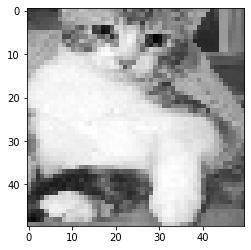

In [ ]:
plt.imshow(training_data[0][0], cmap='gray')  # graph it
plt.show()  # display!

<h2>Step 3: Build/Train the model</h2>


In [ ]:

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=10, epochs=3,validation_split=0.3)

Epoch 1/3
8/8 [==============================] - 4s 443ms/step - loss: 1.0322 - accuracy: 0.6056 - val_loss: 0.6927 - val_accuracy: 0.6129
Epoch 2/3
8/8 [==============================] - 3s 417ms/step - loss: 0.6969 - accuracy: 0.5070 - val_loss: 0.7086 - val_accuracy: 0.3871
Epoch 3/3
8/8 [==============================] - 3s 416ms/step - loss: 0.6881 - accuracy: 0.5493 - val_loss: 0.7420 - val_accuracy: 0.3871


check the model summary

In [ ]:
model.summary()
model.evaluate(X, y)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 48, 48, 256)       2560      
                                                                 
 activation_54 (Activation)  (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 24, 24, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 22, 22, 256)       590080    
                                                                 
 activation_55 (Activation)  (None, 22, 22, 256)       0         
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 11, 11, 256)      0         
 g2D)                                                

[0.7022342085838318, 0.5]

<h2>Step 4: Save the model and load it into anther variable</h2>


In [ ]:
model.save("cifar10.model")
model = load_model("cifar10.model")

INFO:tensorflow:Assets written to: cifar10.model/assets


recheck the model summary

In [ ]:
model.summary()
model.evaluate(X, y)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 48, 48, 256)       2560      
                                                                 
 activation_54 (Activation)  (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 24, 24, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 22, 22, 256)       590080    
                                                                 
 activation_55 (Activation)  (None, 22, 22, 256)       0         
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 11, 11, 256)      0         
 g2D)                                                

[0.7022342085838318, 0.5]

<h2>Bonus: Learn how to extract the paramters from the model</h2>


In [ ]:
# Please don't leave me blank :'(

<h2>Step 5: Link your recourses</h2>


https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/

https://pythonprogramming.net/convolutional-neural-network-deep-learning-python-tensorflow-keras/

https://www.youtube.com/watch?v=j-3vuBynnOE&list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN&index=2

https://www.youtube.com/watch?v=WvoLTXIjBYU&list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN&index=3